# Staking Slashing Scenarios

In [1]:
import plotly.io as pio
pio.renderers.default = "png"

import sys
sys.path.append('../')

from aztec_gddt.analysis.execute import execute_sim, complexity_desc
from aztec_gddt.analysis.visualizations import plot_agg_kpis, plot_inspect_vars
from aztec_gddt.analysis.metrics import *
from aztec_gddt.scenario_experiments import *

import gcsfs
fs = gcsfs.GCSFileSystem()

## 1. Resumption from Inactivity

In [2]:
# exp_spec = experiment_stakeslash_resume_inactivity

# # Override default configuration
# exp_spec.N_timesteps = 1_000
# exp_spec.N_samples = 1
# exp_spec.N_config_sample = 10

# CONTROL_PARAMS = list(exp_spec.params_swept_control.keys())

# sim_df, exec_time = execute_sim(exp_spec.prepare())
# agg_df, c_agg_df = retrieve_feature_df(sim_df, CONTROL_PARAMS, exp_spec.relevant_per_trajectory_group_metrics)

path = 'gs://aztec-gddt-v2-sim/SS-SG1/2025-02-05T17:47:55Z/'

with fs.open(path + 'spec.json', 'r') as fid:
    exp_spec = ExperimentParamSpec.from_json(fid.read()) # type: ginore

sim_df = pd.read_pickle(path + 'timestep_tensor-0.pkl.gz')
agg_df = pd.read_pickle(path + 'trajectory_tensor.pkl.gz')
c_agg_df = compute_agg_df(exp_spec.relevant_per_trajectory_group_metrics, agg_df)

## Summary

### Objective 
The Resumption from Inactivity scenario evaluates the network's ability to successfully resume activities after a portion of the network has been slashed due to inactivity. While mass slashings of consensus participants should only happen in extreme cases, the current slashing model theoretically allows validators to slash each other for arbitrary reasons. Even though it is too early to simulate specific attacks, it is necessary to further understand the effects of such events - even though the underlying reasons that lead to such an event might not be clear yet. If a high share of validators become inactive due to slashing, the network can become inactive. 
This scenario assesses how successful the network is at resuming activities after a proportion of the network has been slashed due to inactivity.

### Experimental Setup

#### Testing Variables: 

##### Environmental:

The environment introduces the possibility of a validator failing to provide a signature, which is the main slashable offense for this scenario. The probability that a validator fails to provide a signature is given by `SIGNATURE_SKIP_PROBABILITY`.

##### Protocol: 

In order to assess the network's ability to resume finalization after slashing-induced inactivity, this group has the following parameters:

1. `PERCENTAGE_STAKE_SLASHED` - The percentage of a validator's stake that is slashed when the slashing mechanism is activated.
2. `VALIDATOR_COMMITTEE_SIZE` - The size of the validator committee responsible for validation.
3. `SIGNATURES_NEEDED` - The fraction of the `VALIDATOR_COMMITTEE_SIZE` required for validation.

#### Simulation input/output per Monte Carlo run:

##### Input:
- Time series of events drawn from a set of events that include slashable offenses. These events are used to assess the impact on network activity and resumption.

##### Output:  
- Time series of epoch finalization events on L1, capturing the periods of network activity and resumption from inactivity.
- Monte Carlo runs ($M$ runs indexed by $m$): 
    For each parameter constellation of interest, a realization from a set of events is drawn for every validator at every block. Some (perhaps all) of the events in the set are slashable offenses, and some contribute to network inactivity when a validator is 1) offline, as evidenced by an event realization, or 2) removed by the protocol, after accumulating too many offenses. The realization probability may be coarsely specified as a fixed probability of drawing a slashable offense for each validator, and then another probability of which offense has occurred. A non-slashable event is ignored.

#### Sweep Parameters:

##### Control:

In [3]:
exp_spec.print_control_params()

PERCENTAGE_STAKE_SLASHED_C: [0.0, 0.1, 1.0]
VALIDATOR_COMMITTEE_SIZE: [128, 256, 512]
SIGNATURES_NEEDED: [0.33, 0.5, 0.66]


##### Environmental:

In [4]:
exp_spec.print_env_params()

SIGNATURE_SKIP_PROBABILITY: [0.0, 0.02]


#### Simulation Behavior: 

#### Threshold Inequalities:

#### Metrics:
1. **Percentage of Finalization Resumption from Inactivity:**
    
    - Defined as the fraction of Monte Carlo runs for which finalization has fully resumed by the end of the run, where validators have been inactive due to slashing.
    - **Interpretation:** A resilient network resumes finalization after slashing events have caused a number of validators to become inactive. This is represented by a high percentage of runs exhibiting full finalization resumption by the end of the simulation run.

### Computational Complexity

In [5]:
print(complexity_desc(exp_spec))


    #### Computational Complexity:
    1. Total number of parameter combinations: 54
    2. Total number of Monte Carlo runs per parameter combination: 50
    3. Total number of trajectories: 2,700
    4. Total number of timesteps per trajectory: 3,000
    5. Total number of state measurements: 8,100,000
    


### Simulation Results 

**The following simulation results (as of January 2025) focus upon one type of slashable offense (failure to provide signatures).**

:::info
See [main doc](https://hackmd.io/@blockscience/B1QKItvEye) for copyable explanations (or referenceable)
:::

- [ ] :dart: Write descriptive interpretation over the plot below :dart: 
- [ ] :dart: Generate an analogue plot below for the results :dart:

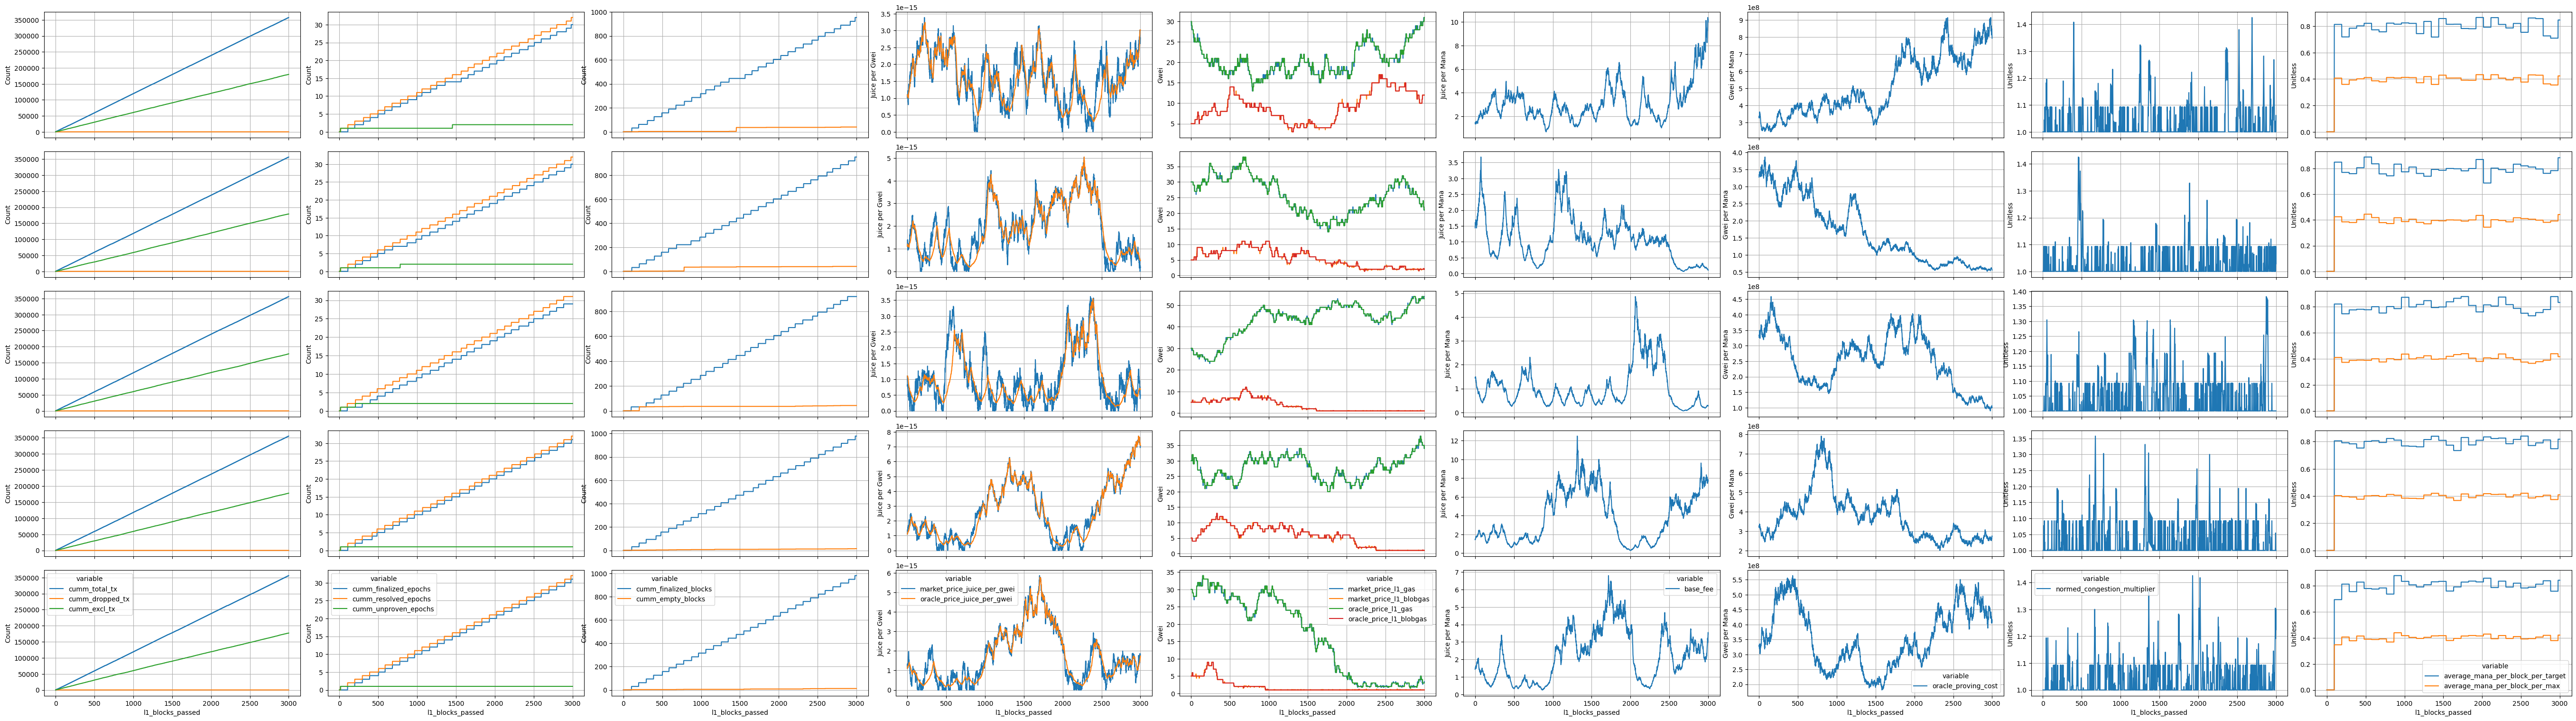

In [6]:
plot_inspect_vars(sim_df)

### Protocol Parameter Recommendations 

:::info
See [main doc](https://hackmd.io/@blockscience/B1QKItvEye) for copyable explanations (or referenceable)
:::

- [ ] :dart: Write descriptive interpretation over table :dart: 
- [ ] :dart: Generate an analogue table below for the results :dart: 


| Control Parameter | Recommended Range | Unit |
| - | - | - |
| RELATIVE_TARGET_MANA_PER_BLOCK | tbd | Mana |
| MAXIMUM_MANA_PER_BLOCK | tbd | Mana |
| MINIMUM_MULTIPLIER_CONGESTION | tbd | Unitless |
| UPDATE_FRACTION_CONGESTION | tbd | 1 / Mana |
| OVERHEAD_MANA_PER_TX | tbd | Mana |
| PROVING_COST_MODIFIER_INITIAL_C | tbd | Mana |
| FEE_JUICE_PRICE_MODIFIER_INITIAL_C | tbd | Juice per Gwei |
| MAXIMUM_UPDATE_PERCENTAGE_C | tbd | Unitless |

### Decision Tree and Parameter Importance

:::info
See [main doc](https://hackmd.io/@blockscience/B1QKItvEye) for copyable explanations (or referenceable)
:::
- [ ] :dart: Write descriptive interpretation over the plot below :dart: 
- [ ] :dart: Generate an analogue plot below for the results :dart:

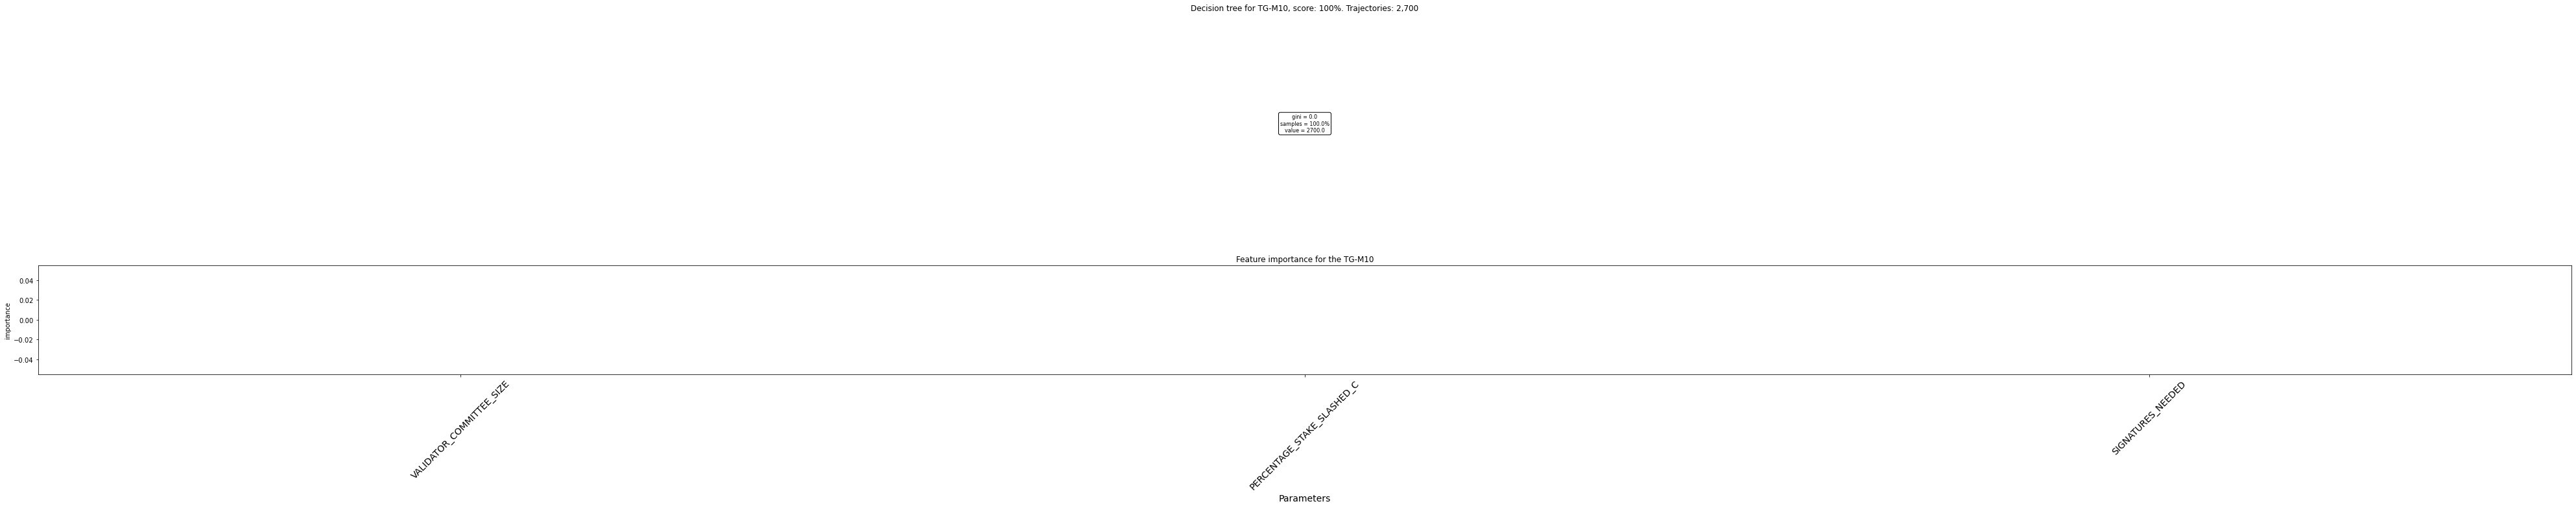

In [7]:
plot_agg_kpis(c_agg_df, exp_spec.params_swept_control, exp_spec.relevant_per_trajectory_group_metrics)

### Commentary on Results:

:dart: Write anything that comes up to mind based on the interpretation over all the results :dart: 

## Conclusion

- [ ] 🔫 Jakob owns after Danilo wrote commentary on results 🔫

## Appendix:
### Parameter Impact on Metrics: 

## 2. Validator Ejection

In [8]:
# exp_spec = experiment_stakeslash_validator_eject

# # Override default configuration
# exp_spec.N_timesteps = 1_000
# exp_spec.N_samples = 1
# exp_spec.N_config_sample = 10

# CONTROL_PARAMS = list(exp_spec.params_swept_control.keys())

# sim_df, exec_time = execute_sim(exp_spec.prepare())
# agg_df, c_agg_df = retrieve_feature_df(sim_df, CONTROL_PARAMS, exp_spec.relevant_per_trajectory_group_metrics)

path = 'gs://aztec-gddt-v2-sim/SS-SG2/2025-02-05T17:49:45Z/'

with fs.open(path + 'spec.json', 'r') as fid:
    exp_spec = ExperimentParamSpec.from_json(fid.read()) # type: ginore

sim_df = pd.read_pickle(path + 'timestep_tensor-0.pkl.gz')
agg_df = pd.read_pickle(path + 'trajectory_tensor.pkl.gz')
c_agg_df = compute_agg_df(exp_spec.relevant_per_trajectory_group_metrics, agg_df)

### Objective 
The Validator Ejection scenario evaluates the potential risks of creating periods of downtime due to slashing behavior. 
While mass slashings of consensus participants should only happen in extreme cases, the current slashing model theoretically allows validators to slash each other for arbitrary reasons. Even though it is too early to simulate specific attacks, it is necessary to further understand the effects of such events - even though the underlying reasons that lead to such an event might not be clear yet. If a high share of validators are slashed - and ejected from the active validator set (aka "jailed", or "exited") - finalization of the L2 chain might stop. Understanding what happens after such events can help further designing and refining the slashing conditions and magnitudes, as well as fail-safes that help return to active finalization sooner. 
This scenario specifically examines the likelihood of creating periods without finalization after validators are ejected from the network due to slashable offenses.

### Experimental Setup

#### Testing Variables: 

##### Environmental:

The environment specifies whether and how many validators are slashed as the 'backdrop' against which slashing control parameters are assessed. As such, it does not endogenize slashing events or which validator(s) commit infractions, but future work may combine this scenario with a more full characterization of slashing activities. The environmental parameter encoding this 'backdrop' is `MAX_VALIDATORS_TO_SLASH`, where a value of `0.0` means that there is no slashable activity (and hence no slashing).

##### Protocol: 
In order to assess the impact of slashing activity on network performance, this group has the following parameters:

1. `PERCENTAGE_STAKE_SLASHED` - The percentage of a validator's stake that is slashed when the slashing mechanism is activated.
2. `VALIDATOR_COMMITTEE_SIZE` - The size of the validator committee responsible for validation.
3. `SIGNATURES_NEEDED` - The fraction of the `VALIDATOR_COMMITTEE_SIZE` required for validation.

#### Simulation input/output per Monte Carlo run:

##### Input:
- Time series of events, drawn from a set of events that include slashable offenses

##### Output:  
- Time series of epoch finalization events on L1, capturing the periods of network activity and resumption from inactivity.
- Monte Carlo ($M$ runs indexed by $m$):
    For each parameter constellation of interest, a realization from a set of events is drawn for every validator at every block. Some (perhaps all) of the events in the set are slashable offenses, and some contribute to network inactivity when a validator is 1) offline, as evidenced by an event realization, or 2) removed by the protocol, after accumulating too many offenses. The realization probability may be coarsely specified as a fixed probability of drawing a slashable offense for each validator, and then another probability of which offense has occurred. A non-slashable event is ignored.

#### Sweep Parameters:

##### Control:

In [9]:
exp_spec.print_control_params()

PERCENTAGE_STAKE_SLASHED_C: [0.0, 0.1, 1.0]
VALIDATOR_COMMITTEE_SIZE: [128, 256, 512]
SIGNATURES_NEEDED: [0.33, 0.5, 0.66]


##### Environmental:

In [10]:
exp_spec.print_env_params()

MAX_VALIDATORS_TO_SLASH: [0.0, 1.0]


#### Simulation Behavior: 

#### Threshold Inequalities:

#### Metrics:
1. **Average Percentage of Inactivity:**    
- Defined as the average over all Monte Carlo runs of the fraction of time the network was inactive due to forced validator exit from slashing.
- Interpretation: A high percentage of inactivity may exceed a pre-defined upper bound (defined from stakeholder requirements), and indicate that although slashing events are applied per validator, some parameter constellations may be more likely to create "clusters" of validator inactivity.

#### Computational Complexity:

In [11]:
print(complexity_desc(exp_spec))


    #### Computational Complexity:
    1. Total number of parameter combinations: 54
    2. Total number of Monte Carlo runs per parameter combination: 50
    3. Total number of trajectories: 2,700
    4. Total number of timesteps per trajectory: 3,000
    5. Total number of state measurements: 8,100,000
    


### Simulation Results

**The following simulation results (as of January 2025) assume a slashable event has or has not occurred, without endogenizing the probability of slashable events.**


:::info
See [main doc](https://hackmd.io/@blockscience/B1QKItvEye) for copyable explanations (or referenceable)
:::

- [ ] :dart: Write descriptive interpretation over the plot below :dart: 
- [ ] :dart: Generate an analogue plot below for the results :dart: 

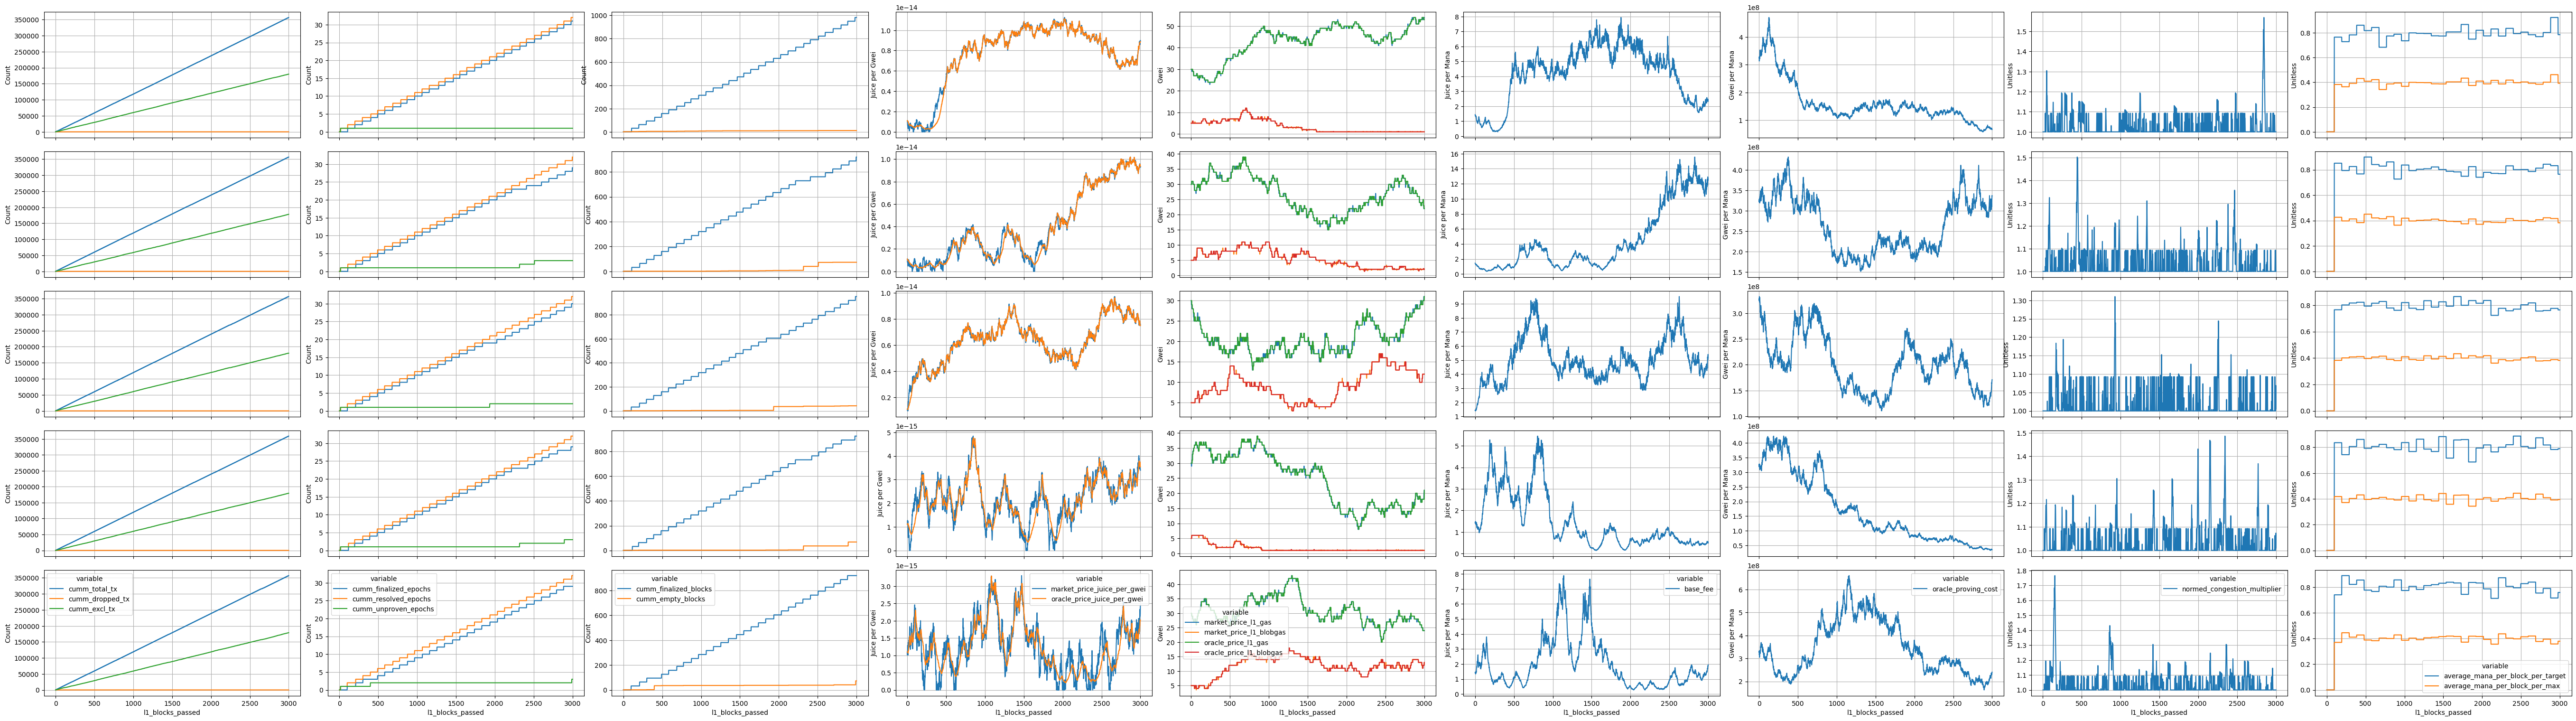

In [12]:
plot_inspect_vars(sim_df)

### Protocol Parameter Recommendations 

:::info
See [main doc](https://hackmd.io/@blockscience/B1QKItvEye) for copyable explanations (or referenceable)
:::

- [ ] :dart: Write descriptive interpretation over table :dart: 
- [ ] :dart: Generate an analogue table below for the results :dart: 


| Control Parameter | Recommended Range | Unit |
| - | - | - |
| RELATIVE_TARGET_MANA_PER_BLOCK | tbd | Mana |
| MAXIMUM_MANA_PER_BLOCK | tbd | Mana |
| MINIMUM_MULTIPLIER_CONGESTION | tbd | Unitless |
| UPDATE_FRACTION_CONGESTION | tbd | 1 / Mana |
| OVERHEAD_MANA_PER_TX | tbd | Mana |
| PROVING_COST_MODIFIER_INITIAL_C | tbd | Mana |
| FEE_JUICE_PRICE_MODIFIER_INITIAL_C | tbd | Juice per Gwei |
| MAXIMUM_UPDATE_PERCENTAGE_C | tbd | Unitless | 

### Decision Tree and Parameter Importance

:::info
See [main doc](https://hackmd.io/@blockscience/B1QKItvEye) for copyable explanations (or referenceable)
:::
- [ ] :dart: Write descriptive interpretation over the plot below :dart: 
- [ ] :dart: Generate an analogue plot below for the results :dart:

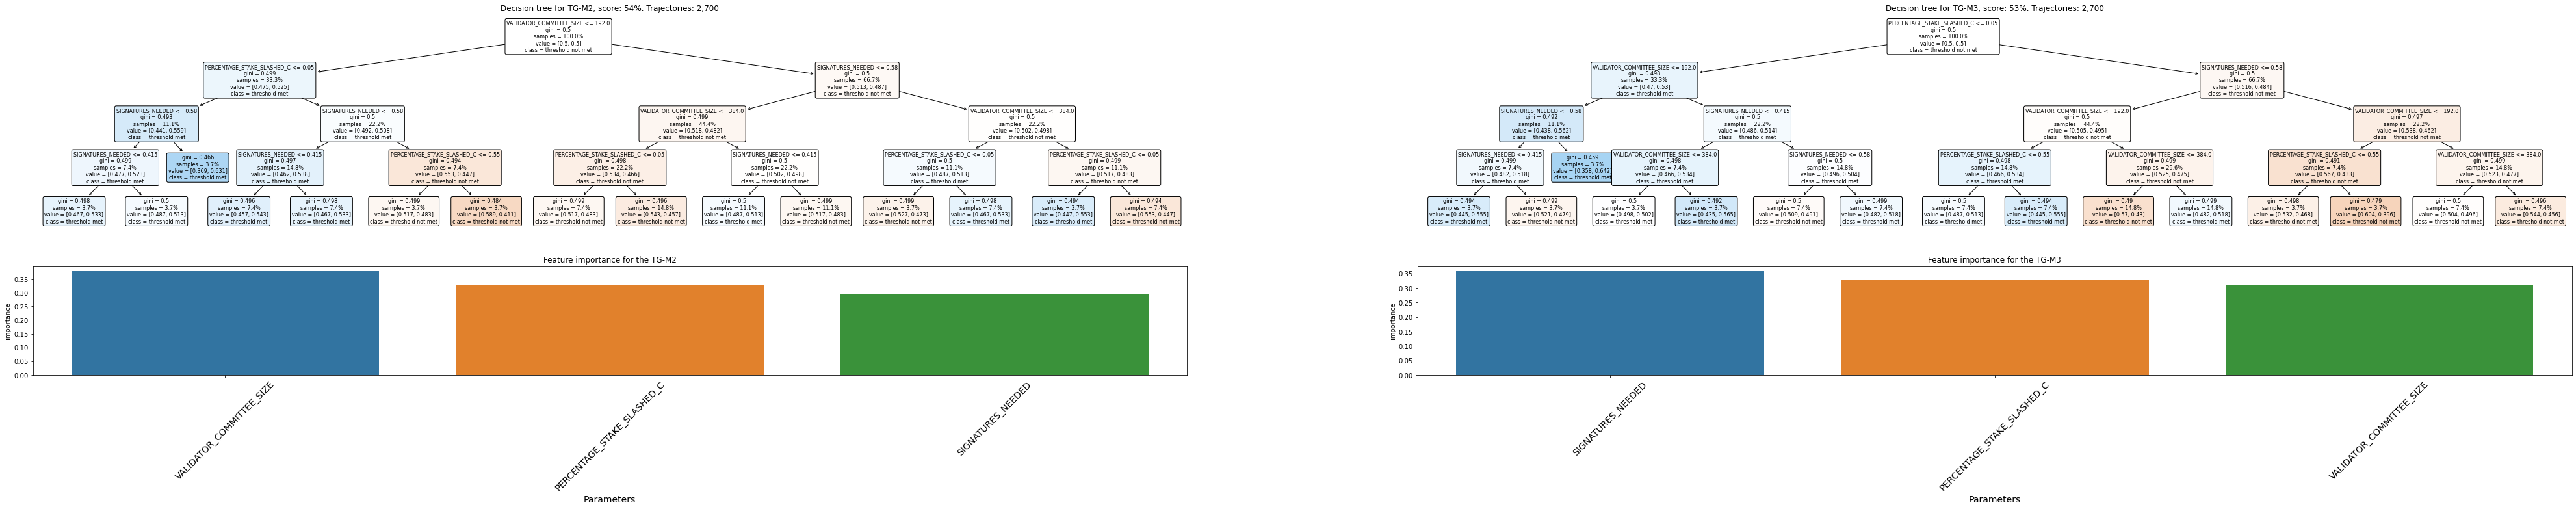

In [13]:
plot_agg_kpis(c_agg_df, exp_spec.params_swept_control, exp_spec.relevant_per_trajectory_group_metrics)

### Commentary on Results:

:dart: Write anything that comes up to mind based on the interpretation over all the results :dart: 

## Conclusion

- [ ] 🔫 Jakob owns after Danilo wrote commentary on results 🔫

## Appendix:
### Parameter Impact on Metrics: 